In [2]:
import numpy as np
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = load_dataset("nampdn-ai/tiny-codes")

Generating train split: 1632309 examples [01:00, 26814.45 examples/s]


In [4]:
dataset_intermediate = pd.DataFrame(dataset)

In [5]:
df_dataset = pd.DataFrame(list(dataset_intermediate['train']))
len(df_dataset)

1632309

In [6]:
df_small = df_dataset.sample(n=163230)
def clean_data(s):
    for c in s:
        if c not in '\n !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~':
            return ""
    return s

In [10]:
languages = list(set(df_dataset['programming_language']))
print(languages)

languages = ['Python', 'JavaScript'] #, 'Java', 'Rust', 'Bash', 'C#', 'C++', 'Go', 'Ruby', 'TypeScript', 'Julia']
language_counts = {}

for i in range(len(languages)):
    if i < 3:
        continue
    f = open(f'data/code_{i}/code_data.txt', 'w')
    curr_languages = languages[:i+1]
    for l in curr_languages:
        language_entries = df_dataset[df_dataset['programming_language'] == l]['response']
        for entry in language_entries:
            clean = clean_data(entry)
            if clean:
                language_counts[l] = len(language_entries)
                f.write(clean)
    f.close()

    print(language_counts)

['Neo4j database and Cypher', 'C#', 'Python', 'C++', 'Julia', 'TypeScript', 'Bash', 'relation database and SQL', 'Java', 'JavaScript', 'Ruby', 'Rust', 'Go']
{'Python': 129063}
{'Python': 129063, 'JavaScript': 131014}
{'Python': 129063, 'JavaScript': 131014, 'Java': 123994}


In [15]:
for i in range(5):
    f = open(f'data/code_py{i}/code_data.txt', 'w')
    python_entries = df_dataset[df_dataset['programming_language'] == "Python"].sample(n=int(0.2*(i+1)*129063//2))['response']
    for entry in python_entries:
        clean = clean_data(entry)
        if clean:
            f.write(clean)
    f.close()

In [14]:
for i in range(5):
    f = open(f'data/code_py{i}/code_data.txt', 'w')
    python_entries = (df_dataset[df_dataset['programming_language'] == "Python"].sample(n=int(129063//2)))['response']
    j_entries = df_dataset[df_dataset['programming_language'] == "Java"].sample(n=int(0.2*(i+1)*129063//2))['response']
    for entry in python_entries:
        clean = clean_data(entry)
        if clean:
            f.write(clean)
    for entry in j_entries:
        clean = clean_data(entry)
        if clean:
            f.write(clean)
    f.close()

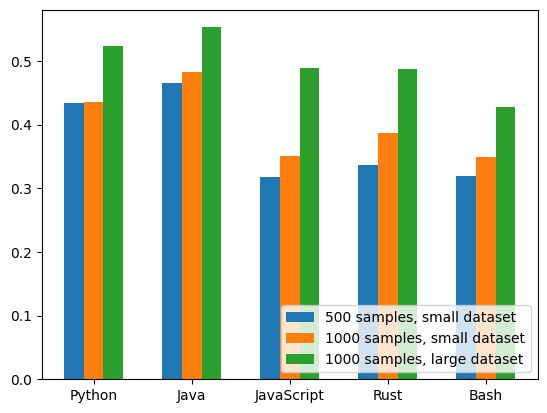

In [23]:
small_small =  [217/500, 233/500, 159/500, 168/500, 160/500]
small_large = [436/1000, 483/1000, 351/1000, 387/1000, 349/1000]
large_large = [524/1000, 553/1000, 489/1000, 488/1000, 427/1000]

names = ['Python', 'Java', 'JavaScript', 'Rust', 'Bash']
x = np.arange(len(names))
kws = dict(width=0.2)
plt.bar(x - 0.2, height=small_small, label='500 samples, small dataset', **kws)
plt.bar(x, height=small_large, label='1000 samples, small dataset', **kws)
plt.bar(x + 0.2, large_large, label='1000 samples, large dataset', **kws)
plt.xticks(x, names)
plt.legend(loc='lower right')
plt.show()

In [9]:
len(df_dataset[df_dataset['programming_language'] == "Python"])

129063